# read in thermal plume numerical simulation as pyvista format

In [ ]:
# import sys
# path=sys.path
# #make sure numpy>= 1.20 and numba 0.48 under current env is with higher priority
# sys.path.insert(0, '/home/xbao/.conda/envs/pivpost/lib/python3.7/site-packages')
# sys.path.append('/home/xbao/.conda/envs/pivpost/lib/python3.7/site-packages')
import numpy as np
import os
os.environ['DISPLAY']=":0"
os.environ["MESA_GL_VERSION_OVERRIDE"]="3.2"
import pyvista
import meshio
pyvista.start_xvfb()
pyvista.set_jupyter_backend("static")#panel

# import hdbscan
# import time

# from scipy.spatial.distance import cdist
# import cv2
# from scipy.spatial import cKDTree as KDTree
base_path = "/data/xbao/adjoint_exp/04132022_adjoint/"

In [ ]:
step = 6
ckpt_file_path = base_path+"relative_ckpt_pvtu.txt"
ckpt_files = np.loadtxt(ckpt_file_path, dtype=str)

ckpt = pyvista.read(base_path+ckpt_files[step])
ckpt.point_data.remove("Velocity");ckpt.point_data.remove("Pressure");ckpt.point_data.remove("Viscosity")

FTLE_path_prefix = "DG_a2a_tracer_SSPRK5_FTLE_cfl1.5_str2M_segment/FTLE_evo_"
suffix=".pvtu"
FTLE_ckpt_file = base_path+FTLE_path_prefix+str(step)+suffix
FTLE_ckpt = pyvista.read(FTLE_ckpt_file)


# single_slice = FTLE_ckpt.slice(normal=[0, 1, 0],origin=[0.736365,0.3,0.736365])
# single_slice_wT = single_slice.sample(ckpt)
# single_slice_wT.save("Yslice_"+str(step)+".vtk")


In [334]:
FTLE_ckpt

UnstructuredGrid (0x7f1b46200c20)
  N Cells:	12965400
  N Points:	22985963
  X Bounds:	0.000e+00, 1.473e+00
  Y Bounds:	0.000e+00, 1.000e+00
  Z Bounds:	0.000e+00, 1.473e+00
  N Arrays:	5

In [ ]:
step=6
base_path+ckpt_files[step]

In [ ]:
pyvista.global_theme.font.family = 'arial'
pyvista.global_theme.font.color = "black"
pyvista.global_theme.background = 'white'
pyvista.global_theme.font.title_size = 22
pyvista.global_theme.font.label_size = 18
pyvista.global_theme.font.size = 5

In [ ]:
single_slice_Z = FTLE_ckpt.slice(normal=[0, 0, 1],origin=[0.736365,0.5,0.478])
single_slice_wT_Z = single_slice_Z.sample(ckpt)
# single_slice_wT_Z.save("Zslice_"+str(step)+".vtk")

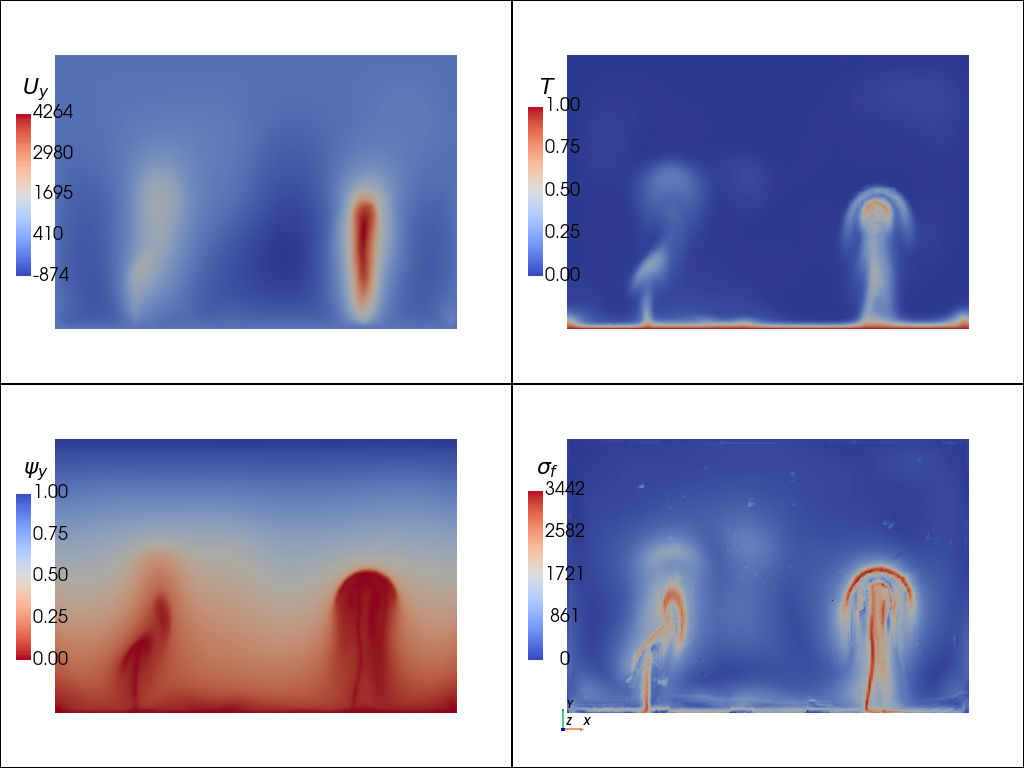

In [257]:
pl = pyvista.Plotter(shape=(2,2))

srags = dict(height=0.5, vertical=True, position_x=0.03, position_y=0.27)

pl.subplot(0, 0)
dargs = dict(
    scalars="Velocity",
    cmap="coolwarm",
    show_scalar_bar=False,
)

pl.add_mesh(single_slice_wT_Z, component=1, **dargs)
pl.add_scalar_bar(
    '$U_y$',
    interactive=False,
    outline=False,
    fmt='%3.0f',
    **srags
    
)

pl.subplot(0, 1)
dargs = dict(
    scalars="NewTemp",
    cmap="coolwarm",
    show_scalar_bar=False,
)

pl.add_mesh(single_slice_wT_Z.copy(), **dargs,clim=(0, 1))
pl.add_scalar_bar(
    '$T$',
    interactive=False,
    outline=False,
    fmt='%1.2f',
    **srags
    
)
           
           
pl.subplot(1, 0)
dargs = dict(
    scalars="Psi",
    cmap="coolwarm_r",
    show_scalar_bar=False,
)

pl.add_mesh(single_slice_wT_Z.copy(), component=1, **dargs,clim=(0, 1))
pl.add_scalar_bar(
    '$\psi_y$',
    interactive=False,
    outline=False,
    fmt='%1.2f',
    **srags
    
)
           
           
pl.subplot(1, 1)
dargs = dict(
    scalars="FTLE",
    cmap="coolwarm",
    show_scalar_bar=False,
)

pl.add_mesh(single_slice_wT_Z.copy(), **dargs)
pl.add_scalar_bar(
    '$\sigma_f$',
    interactive=False,
    outline=False,
    fmt='%4.0f',
    **srags
    
)

#set the view in the end, otherwise to close
pl.link_views()
pl.camera_position = 'xy'
pl.camera.roll = 0
pl.camera.zoom(1.3)
## pl.camera.tight() not available with current version
#https://github.com/pyvista/pyvista/blob/release/0.42/pyvista/plotting/camera.py#L780-L883
pl.window_size = [1024,768]
# pl.show(cpos='zx')

_ = pl.add_axes(
    line_width=2,
    box=False
#     cone_radius=0.6,
#     shaft_length=0.7,
#     tip_length=0.3,
#     ambient=0.5,
#     label_size=(0.4, 0.16),
)


#we can adjust the spacing in svg!
# pl.save_graphic("04132022_ste10_z0.8.svg")  
pl.show()

In [307]:
x_max = 1.35
x_min = x_max - 225/275
y_min = 0.015
y_max = y_min + 225/275
z = 0.478
# consider the points as pixel centers
pixels = 1024
velocity_no_bound = np.zeros([pixels**2,3])
velocity_no_bound[:,-1]=z
x_no_bound = np.linspace(x_min,x_max,pixels)
y_no_bound = np.linspace(y_min,y_max,pixels)
x,y = np.meshgrid(x_no_bound,y_no_bound)
velocity_no_bound[:,0]=x.flatten()
velocity_no_bound[:,1]=y.flatten()

In [328]:
#225 mm divided by 1024 pixels, compabale with the pixel size of the real experiment
225/1024

0.2197265625

In [308]:
point_cloud_no_bound = pyvista.PolyData(velocity_no_bound)
data_no_bound = point_cloud_no_bound.sample(single_slice_wT_Z)

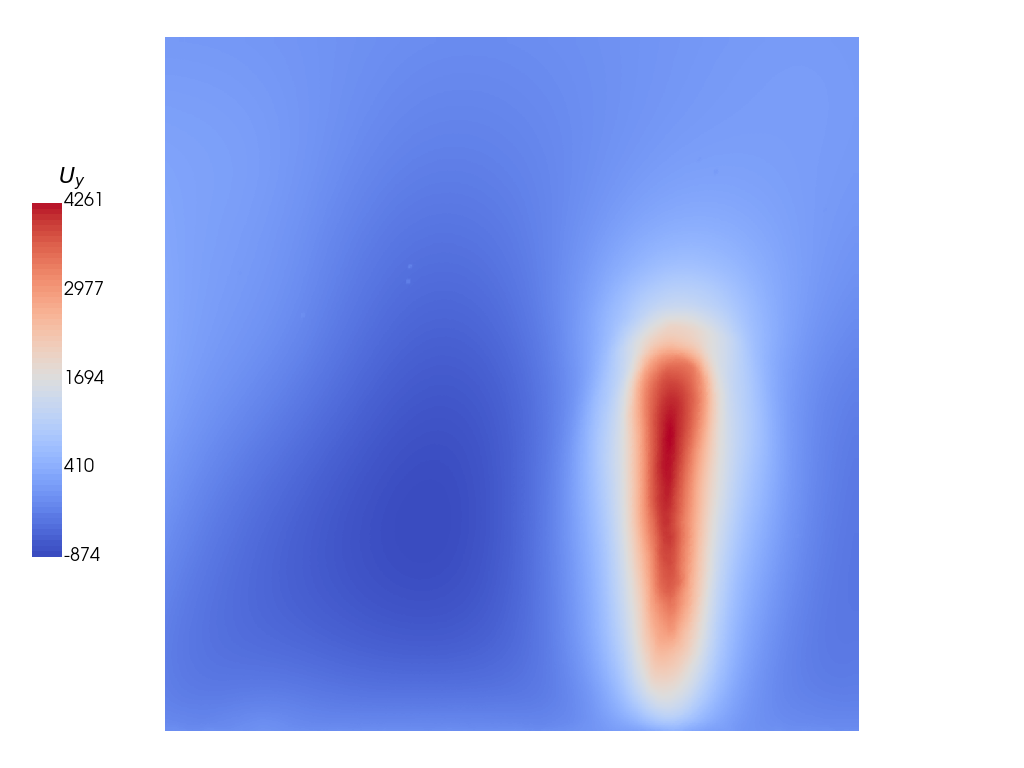

In [309]:
# Create a plotter instance
pl = pyvista.Plotter()
sargs = dict(height=0.5, vertical=True, position_x=0.03, position_y=0.27)

# Dictionary of arguments for adding mesh
dargs = dict(
    scalars="Velocity",
    cmap="coolwarm",
    show_scalar_bar=False,
)

# Ensure data_no_bound and the appropriate component exist
pl.add_mesh(data_no_bound, component=1, **dargs)

# Add a scalar bar
scalar_bar_args = {
    'title': '$U_y$',
    'interactive': False,
    'outline': False,
    'fmt': '%3.0f'
}
pl.add_scalar_bar(**scalar_bar_args, **sargs)

# Set camera position and zoom
pl.camera_position = 'xy'
pl.camera.roll = 0
pl.camera.zoom(1.3)

# Show the plot
pl.show()

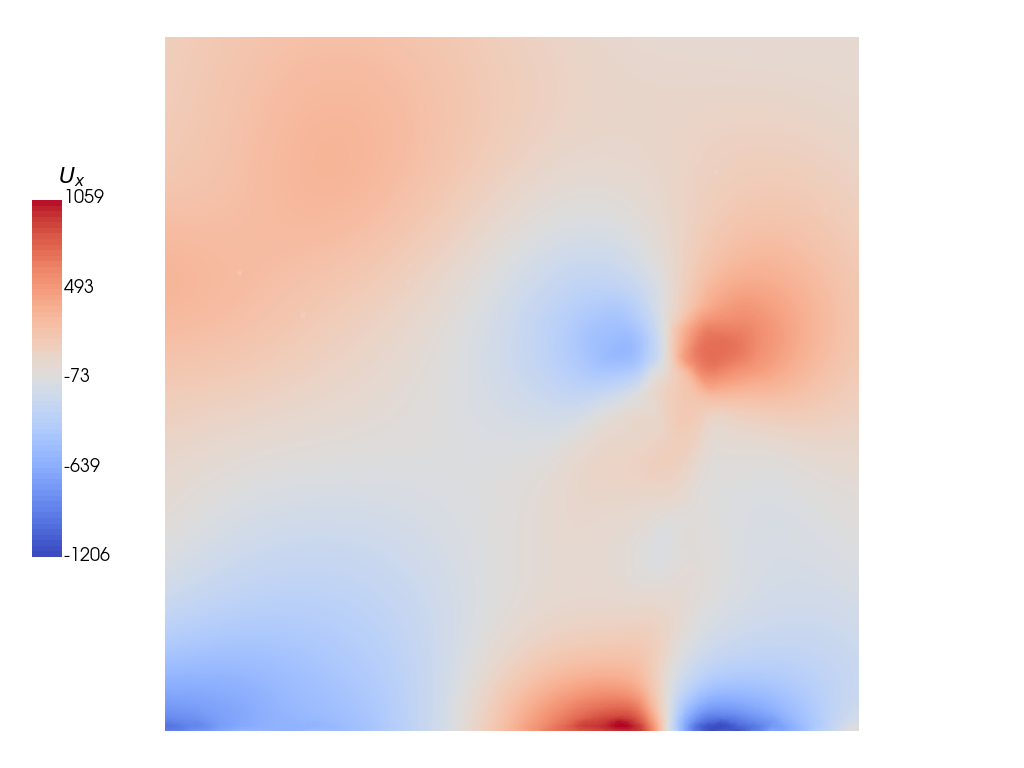

In [310]:
# Create a plotter instance
pl = pyvista.Plotter()
sargs = dict(height=0.5, vertical=True, position_x=0.03, position_y=0.27)

# Dictionary of arguments for adding mesh
dargs = dict(
    scalars="Velocity",
    cmap="coolwarm",
    show_scalar_bar=False,
)

# Ensure data_no_bound and the appropriate component exist
pl.add_mesh(data_no_bound, component=0, **dargs)

# Add a scalar bar
scalar_bar_args = {
    'title': '$U_x$',
    'interactive': False,
    'outline': False,
    'fmt': '%3.0f'
}
pl.add_scalar_bar(**scalar_bar_args, **sargs)

# Set camera position and zoom
pl.camera_position = 'xy'
pl.camera.roll = 0
pl.camera.zoom(1.3)

# Show the plot
pl.show()

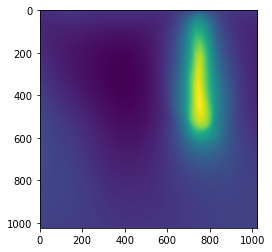

In [311]:
import matplotlib.pyplot as plt
data_y = data_no_bound["Velocity"][:,1].reshape(1024,1024)
plt.imshow(data_y)

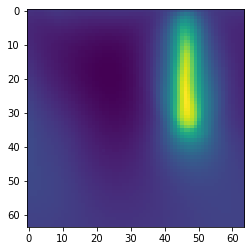

In [312]:
block_size = 16
reshaped_data = data_y.reshape(1024 // block_size, block_size, 1024 // block_size, block_size)
block_means = reshaped_data.mean(axis=(1, 3))
plt.imshow(block_means)

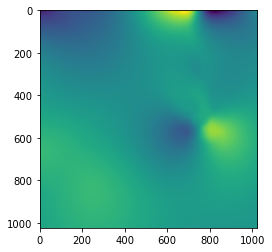

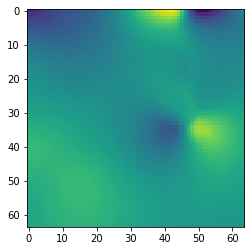

In [313]:
import matplotlib.pyplot as plt
data_x = data_no_bound["Velocity"][:,0].reshape(1024,1024)
plt.figure()
plt.imshow(data_x)
block_size = 16
reshaped_data = data_x.reshape(1024 // block_size, block_size, 1024 // block_size, block_size)
block_means = reshaped_data.mean(axis=(1, 3))
plt.figure()
plt.imshow(block_means)

In [317]:
H =0.275 # m
# g = 9.8 #(m/s^2)
# alpha = 4.1e-4 # K^-1
kcond = 0.346 #(W/(m*K))
Cp = 2300 #J/(kg K)
rho_0 = 1427 #(kg/m^3)
kappa_dim = kcond/rho_0/Cp


timescale = H**2/kappa_dim

# read in tracers at frame 0 and advect them using the synthetic velocity

In [330]:
#data has been saved on to the 1024x1024 grid with actual displacement in pixels
# but below we directly use the original data cloud to skip one interpolation
scaling_pixel = 2*H/timescale/(225/1024)*1000
np.savez("/home/xbao/LAB_test/shadow_filter/synthetic_2d.npz", u=data_x*scaling_pixel, v=data_y*scaling_pixel)

In [331]:
import scipy.io as sio
tracers = sio.loadmat("piv/particle_data_frame_1.mat",simplify_cells=True)

In [332]:
np.min(tracers["X"]),np.max(tracers["X"])

(-112935.13921572972, 113149.06428118418)

In [333]:
x_mapped = (tracers["X"]-(-11.25e4))/22.5e4*(x_max-x_min)+x_min
y_mapped = (tracers["Y"]-(-11.25e4))/22.5e4*(y_max-y_min)+y_min
tracer_mapped = np.zeros([len(x_mapped),3])
tracer_mapped[:,-1] = z
tracer_mapped[:,0] = x_mapped
tracer_mapped[:,1] = y_mapped
tracer_cloud = pyvista.PolyData(tracer_mapped)
tracer_sampled = tracer_cloud.sample(single_slice_wT_Z)

In [318]:
#pixel displacement for 2 sec
np.max(np.abs(2*H/timescale/0.22*1000*tracer_sampled["Velocity"][:,:-1]))

14.813699523276648

In [319]:
# displacement in microns for 2 sec
np.max(np.abs(2*H/timescale*1e6*tracer_sampled["Velocity"][:,:-1]))

3259.0138951208623

In [320]:
scaling = 2*H/timescale*1e6
tracers_shifted = tracers.copy()
tracers_shifted["X"] =  tracers["X"]+scaling*tracer_sampled["Velocity"][:,0]
tracers_shifted["Y"] = tracers["Y"]+scaling*tracer_sampled["Velocity"][:,1]

sio.savemat("piv/particle_data_frame_2.mat",tracers_shifted, appendmat=True, format='5', long_field_names=True)